In [1]:
from ipywidgets import interactive
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import transforms
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets

In [2]:
a = widgets.IntSlider()
b = widgets.IntSlider()
select_dis = widgets.IntSlider()
ui = widgets.HBox([a, b, select_dis])
def f(a, b, select_dis):
    angle = np.linspace(-90 , 90 , 181*10)
    theta = angle*np.pi/180
    P = 1
    l = b - a

    dis = []
    for item in theta :
        dis.append(select_dis*np.tan(item))

    PSD_dis =[]
    for i in range(len(dis)) :
        if dis[i] < a :
            x1 = abs(dis[i] - a)
            theta = np.arctan((x1)/select_dis)
            phi = np.arctan((x1+l)/select_dis)

        elif dis[i] > b :
            x2 = abs(dis[i] - b)
            theta = np.arctan((x2+l)/select_dis)
            phi = np.arctan((x2)/select_dis)
        else :
            x1 = abs(dis[i] - a)
            x2 = abs(b - dis[i])
            theta = np.arctan((x1)/select_dis)
            phi = np.arctan((x2)/select_dis)

        PSD_dis.append((P/(select_dis+1)**2)*(np.cos(theta)**2 + np.cos(phi)**2))

    dis_50 = []
    Power_50 = []
    PSD_50 = max(PSD_dis)/2
    limit = max(PSD_dis)/(500*select_dis)
    for i in range(len(PSD_dis)) :  
        if PSD_50 - limit <= PSD_dis[i] <= PSD_50 + limit :
            dis_50.append(dis[i])
            Power_50.append(PSD_dis[i])

    fig = plt.figure(figsize = (14,7))
    plt.plot(dis,PSD_dis , label = "Power Spectral Density Plot")
    plt.plot(dis_50[0], Power_50[0] , 'ro' , label = 'Half Power Distance at \u00B1 %1.2fm' %dis_50[1])
    for i in range(len(dis_50)-1) :
        plt.plot(dis_50[i+1], Power_50[i+1] , 'ro')
    plt.grid()
    plt.title("Power Spectral Density of Hemispherical Beam")
    plt.xlabel("Distance (m)")
    plt.ylabel("PSD (W)")
    plt.xlim(-1 , 1)
    plt.yticks(np.arange(0,max(PSD_dis)+max(PSD_dis)/10 , step = max(PSD_dis)/10))
    plt.legend()
    plt.show()

out = interactive(f, a = (-1, 1, 0.01) , b = (-1, 1, 0.01) , select_dis = (0.1 , 3 , 0.1))
out

interactive(children=(FloatSlider(value=0.0, description='a', max=1.0, min=-1.0, step=0.01), FloatSlider(value…

In [3]:
a = widgets.IntSlider()
b = widgets.IntSlider()
select_dis = widgets.IntSlider()
ui = widgets.HBox([a, b, select_dis])
def f(a, b, select_dis):
    angle = np.linspace(-90 , 90 , 181*10)
    theta = angle*np.pi/180
    P = 1
    l = b - a

    dis = []
    for item in theta :
        dis.append(select_dis*np.tan(item))

    PSD_dis =[]
    for i in range(len(dis)) :
        if dis[i] < a :
            x1 = abs(dis[i] - a)
            theta = np.arctan((x1)/select_dis)
            phi = np.arctan((x1+l)/select_dis)

        elif dis[i] > b :
            x2 = abs(dis[i] - b)
            theta = np.arctan((x2+l)/select_dis)
            phi = np.arctan((x2)/select_dis)
        else :
            x1 = abs(dis[i] - a)
            x2 = abs(b - dis[i])
            theta = np.arctan((x1)/select_dis)
            phi = np.arctan((x2)/select_dis)

        PSD_dis.append((P/(select_dis+1)**2)*(np.cos(theta)**2 + np.cos(phi)**2))

    angle_50 = []
    Power_50 = []
    PSD_50 = max(PSD_dis)/2
    limit = max(PSD_dis)/(100*select_dis)
    for i in range(len(PSD_dis)) :  
        if PSD_50 - limit <= PSD_dis[i] <= PSD_50 + limit :
            angle_50.append(angle[i])
            Power_50.append(PSD_dis[i])

    fig = plt.figure(figsize = (14,7))
    plt.plot(angle,PSD_dis , label = "Power Spectral Density Plot")
    plt.plot(angle_50[0], Power_50[0] , 'ro' , label = 'Half Power Angle at \u00B1 %1.2f$^\circ$' %angle_50[1])
    for i in range(len(angle_50)-1) :
        plt.plot(angle_50[i+1], Power_50[i+1] , 'ro')
    plt.grid()
    plt.title("Power Spectral Density of Hemispherical Beam")
    plt.xlabel("Angle ($^\circ$)")
    plt.ylabel("PSD (W)")
    plt.xticks(np.arange(-90 , 100 , step = 10))
    plt.yticks(np.arange(0,max(PSD_dis)+max(PSD_dis)/10 , step = max(PSD_dis)/10))
    plt.legend()
    plt.show()

out = interactive(f, a = (-1, 1, 0.1) , b = (-1, 1, 0.1) , select_dis = (0.1 , 3 , 0.1))
out


interactive(children=(FloatSlider(value=0.0, description='a', max=1.0, min=-1.0), FloatSlider(value=0.0, descr…

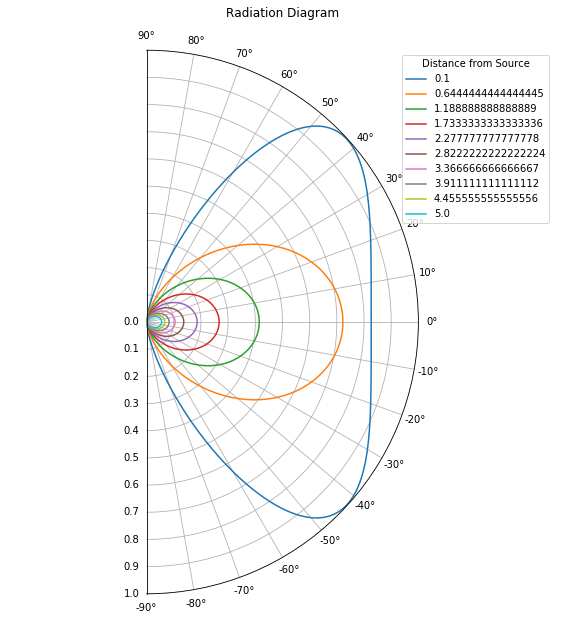

In [4]:
select_dis = np.linspace(0.1,5,10)
angle = np.linspace(-90 , 90 , 181*10)
theta = angle*np.pi/180
P = 1
a = -.1
b = .1
l = b - a

dis = []
for i in select_dis :
    dis.append(i*np.tan(theta))
    
PSD_dis = []
for c in range(len(select_dis)) :
    PSD_temp = []
    for item in dis[c] :
        if item < a :
            x1 = abs(item - a)
            theta1 = np.arctan((x1)/select_dis[c])
            phi = np.arctan((x1+l)/select_dis[c])

        elif item > b :
            x2 = abs(item - b)
            theta1 = np.arctan((x2+l)/select_dis[c])
            phi = np.arctan((x2)/select_dis[c])
        else :
            x1 = abs(item - a)
            x2 = abs(b - item)
            theta1 = np.arctan((x1)/select_dis[c])
            phi = np.arctan((x2)/select_dis[c])

        PSD_temp.append((P/(select_dis[c]+1)**2)*(np.cos(theta1)**2 + np.cos(phi)**2))
        
    PSD_dis.append(PSD_temp)


plt.figure(figsize = (20,10))
for i in range(len(PSD_dis)) : 
    plt.polar(theta , PSD_dis[i] , label = select_dis[i])
    
limit = 1
plt.ylim(0, limit)
plt.xlim(-np.pi/2 , np.pi/2)
plt.xticks(np.arange(-np.pi/2, np.pi/2 +10*np.pi/180 , step=(10*np.pi/180)))
plt.yticks(np.arange(0,limit+.1,step= limit/10))
plt.title("Radiation Diagram")
plt.legend(title = "Distance from Source")
plt.show()